In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import os
import geopandas as gpd
import geoplot
import geoplot.crs as gcrs
import rasterio
import matplotlib.pyplot as plt
import time
from rasterstats import zonal_stats
from osgeo import gdal
import numpy as np
import sys
import geopandas as gdp

sys.path.append(os.path.abspath("../Functions/"))
import Preprocess

In [3]:
mandal_boundaries = gpd.read_file('../../../../../src/data_preprocessing/base_geojson/TS_mandal_boundary.json')
mandal_boundaries = mandal_boundaries.reset_index()

district_boundaries = gpd.read_file('../../../../../src/data_preprocessing/base_geojson/TS_district_boundary.json')
district_boundaries = district_boundaries.reset_index()

shape_telangana = gpd.read_file('../../../../../src/data_preprocessing/base_geojson/TL_state_shapefile_for_clip.geojson')
shape_telangana = shape_telangana.explode()

#os.chdir('c:\\Users\\Jesse\\OneDrive\\Documenten\\Master BAOR\\Thesis\\GitHub\\dicra\\analytics\\sandbox\\notebooks\\crop_fires\\DPPD_Jesse\\Data')
#one_km_grid = gpd.read_file('telangana_1km_grid.geojson')
#one_km_grid = one_km_grid.reset_index()

#os.chdir('c:\\Users\\Jesse\\OneDrive\\Documenten\\Master BAOR\\Thesis\\GitHub\\dicra\\analytics\\sandbox\\notebooks\\crop_fires\\DPPD_Jesse\\Data')
#ten_km_grid = gpd.read_file('telangana_10km_grid.geojson')
#ten_km_grid = ten_km_grid.reset_index()

In [4]:
import importlib
importlib.reload(Preprocess)

<module 'Preprocess' from '/home/luckyw0w/dicra/analytics/sandbox/notebooks/crop_fires/Functions/Preprocess.py'>

## DATA MISSING: Here Data required to Run these functions

In [ ]:
stat_df_PM25 = Preprocess.read_tiffs(mandal_boundaries, 'Mandal', 'PM2.5', 3, 5, 6, 10, True, 'mean')
stat_df_NO2 = Preprocess.read_tiffs(mandal_boundaries, 'Mandal',  'NO2', 3, 5, 6, 10, True, 'mean')
stat_df_SSM_median = Preprocess.read_tiffs(mandal_boundaries, 'Mandal', 'SSM', 9, 11, 4, 8, True, 'median')
stat_df_SSM_mean = Preprocess.read_tiffs(mandal_boundaries, 'Mandal', 'SSM', 9, 11, 4, 8, True, 'mean')
stat_df_SSM_max = Preprocess.read_tiffs(mandal_boundaries, 'Mandal', 'SSM', 9, 11, 4, 8, True, 'max')
stat_df_SSM_min = Preprocess.read_tiffs(mandal_boundaries, 'Mandal', 'SSM', 9, 11, 4, 8, True, 'min')
stat_df_SSM_percentile_90 = Preprocess.read_tiffs(mandal_boundaries, 'Mandal', 'SSM', 9, 11, 4, 8, True, 'percentile_90')
stat_df_PRE_sum = Preprocess.read_tiffs(mandal_boundaries, 'Mandal', 'PRE_monthly', 5, 7, 0, 4, True, 'sum')
stat_df_PRE_mean = Preprocess.read_tiffs(mandal_boundaries, 'Mandal', 'PRE_monthly', 5, 7, 0, 4, True, 'mean')
stat_df_PRE_percentile_90 = Preprocess.read_tiffs(mandal_boundaries, 'Mandal', 'PRE_monthly', 5, 7, 0, 4, True, 'percentile_90')
stat_df_PRE_max = Preprocess.read_tiffs(mandal_boundaries, 'Mandal', 'PRE_monthly', 5, 7, 0, 4, True, 'max')
stat_df_PRE_min = Preprocess.read_tiffs(mandal_boundaries, 'Mandal', 'PRE_monthly', 5, 7, 0, 4, True, 'min')
stat_df_PRE_median = Preprocess.read_tiffs(mandal_boundaries, 'Mandal', 'PRE_monthly', 5, 7, 0, 4, True, 'median')
stat_df_ST_mean = Preprocess.read_tiffs(mandal_boundaries, 'Mandal', 'ST', 9, 11, 4, 8, True, 'mean')
stat_df_ST_percentile_90 = Preprocess.read_tiffs(mandal_boundaries, 'Mandal', 'ST', 9, 11, 4, 8, True, 'percentile_90')
stat_df_ST_max = Preprocess.read_tiffs(mandal_boundaries, 'Mandal', 'ST', 9, 11, 4, 8, True, 'max')
stat_df_ST_min = Preprocess.read_tiffs(mandal_boundaries, 'Mandal', 'ST', 9, 11, 4, 8, True, 'min')
stat_df_ST_median = Preprocess.read_tiffs(mandal_boundaries, 'Mandal', 'ST', 9, 11, 4, 8, True, 'median')
stat_df_BA_sum = Preprocess.read_tiffs(mandal_boundaries, 'Mandal', 'BA_monthly', 5, 7, 0, 4, False, 'sum')
stat_df_BA_mean = Preprocess.read_tiffs(mandal_boundaries, 'Mandal', 'BA_monthly', 5, 7, 0, 4, False, 'mean')
stat_df_BA_median = Preprocess.read_tiffs(mandal_boundaries, 'Mandal', 'BA_monthly', 5, 7, 0, 4, False, 'median')
stat_df_POP_mean = Preprocess.read_tiffs(mandal_boundaries, 'Mandal', 'Population', 3, 5, 6, 10, False, 'mean')
stat_df_POP_median = Preprocess.read_tiffs(mandal_boundaries, 'Mandal', 'Population', 3, 5, 6, 10, False, 'median')


RWI

In [6]:
os.chdir('C:\\Users\\Jesse\\OneDrive\\Documenten\\Data_Thesis\\RWI_vector')

stat_RWI_df = gpd.read_file('01-01-2021.geojson')
stat_RWI_df = stat_RWI_df.reset_index()

stat_df_RWI_percentile_90 = Preprocess.read_tiffs(mandal_boundaries, 'Mandal', 'RWI', 3, 5, 6, 10, False, 'percentile_90')
stat_df_RWI_percentile_90 = stat_df_RWI_percentile_90.rename(columns = {'Value': 'RWI_percentile_90'})

stat_RWI_df['RWI_mean'] = 0
stat_RWI_df['RWI_min'] = 0
stat_RWI_df['RWI_max'] = 0
stat_RWI_df['RWI_median'] = 0

for i in range (0, len(stat_RWI_df)):
    stat_RWI_df['RWI_mean'].iloc[i] = stat_RWI_df['zonalstat'].iloc[i]['mean']
    stat_RWI_df['RWI_min'].iloc[i] = stat_RWI_df['zonalstat'].iloc[i]['min']
    stat_RWI_df['RWI_max'].iloc[i] = stat_RWI_df['zonalstat'].iloc[i]['max']
    stat_RWI_df['RWI_median'].iloc[i] = stat_RWI_df['zonalstat'].iloc[i]['median']
 
stat_df_RWI = pd.merge(stat_df_RWI_percentile_90, stat_RWI_df[['index', 'RWI_mean', 'RWI_max', 'RWI_min', 'RWI_median']])

Soil Type

In [7]:
file_path = r'C:\\Users\\Jesse\\OneDrive\\Documenten\\Data_Thesis\\Soil Type\\soil_type.tif'
param = rasterio.open(file_path, mode = 'r')
# Assign raster values to a numpy nd array
param_array = param.read(1) # landuse corresponding to each rasterpixel, so we extracted the pixel values from the raster
# affine: 1: corresponds to the width of each pixel, 2: row rotation, 3: x-coordinate of the upper left pixel, 4: column rotation, 5: height of each pixel, 6: y-coordinate of the upper left pixel
affine = param.transform
param.meta
# Geographical coordinate reference system is used (4326)
# lulc.nodata # value which has been assigned for the nodata
mode = zonal_stats(mandal_boundaries.geometry, param_array, affine = param.transform, geojson_out = True, nodata = param.nodata, all_touched = False, stats = ['majority'])
# Extracting the landuse statistics from the list
mode_soiltype = []
i = 0
while i < len(mode):
    mode_soiltype.append(mode[i]['properties']['majority'])
    i = i + 1

Rural Areas

In [8]:
file_path = r'C:\\Users\\Jesse\\OneDrive\\Documenten\\Data_Thesis\\Rural_areas\\urban_rural_catchment_areas.tif'
param = rasterio.open(file_path, mode = 'r')
# Assign raster values to a numpy nd array
param_array = param.read(1) # landuse corresponding to each rasterpixel, so we extracted the pixel values from the raster
# affine: 1: corresponds to the width of each pixel, 2: row rotation, 3: x-coordinate of the upper left pixel, 4: column rotation, 5: height of each pixel, 6: y-coordinate of the upper left pixel
affine = param.transform
param.meta
# Geographical coordinate reference system is used (4326)
# lulc.nodata # value which has been assigned for the nodata
mode = zonal_stats(mandal_boundaries.geometry, param_array, affine = param.transform, geojson_out = True, nodata = param.nodata, all_touched = False, stats = ['median'])
# Extracting the landuse statistics from the list
mode_rural_median = []
i = 0
while i < len(mode):
    mode_rural_median.append(mode[i]['properties']['median'])
    i = i + 1

Crop Area

In [9]:
os.chdir('c:\\Users\\Jesse\\OneDrive\\Documenten\\Master BAOR\\Thesis\\GitHub\\dicra\\analytics\\sandbox\\notebooks\\crop_fires\\Exploration\\Landuse_Analysis')

years = [2017, 2018, 2019]
mandals = mandal_boundaries[['index', 'Mandal_Nam', 'Dist_Name', 'geometry']]

for year in years:
    tiff = '01-01-'+str(year)+'.tif'
    lulc = rasterio.open(tiff, mode = 'r')
    lulc_array = lulc.read(1) # landuse corresponding to each rasterpixel, so we extracted the pixel values from the raster
    # affine: 1: corresponds to the width of each pixel, 2: row rotation, 3: x-coordinate of the upper left pixel, 4: column rotation, 5: height of each pixel, 6: y-coordinate of the upper left pixel
    affine = lulc.transform

    cmap = {1: 'Water', 2: 'Trees', 4: 'Flooded Vegetation', 5: 'Crops', 7: 'Built Area', 8: 'Bare Ground', 9: 'Snow/Ice', 10: 'Clouds', 11: 'Rangeland'}

    test = zonal_stats(mandals.geometry, lulc_array, affine = affine, geojson_out = True, nodata = lulc.nodata, stats = 'majority', categorical=True, category_map = cmap)

    mandals[str(year)+'-01-01 Crops']=0
    mandals[str(year)+'-01-01 Flooded Vegetation']=0
    mandals[str(year)+'-01-01 Trees']=0
    mandals[str(year)+'-01-01 Built Area']=0

    for i in range(0, len(test)):
        try:
            mandals[str(year)+'-01-01 Crops'].iloc[i] = test[i]['properties']['Crops'] 
        except:
            mandals[str(year)+'-01-01 Crops'].iloc[i] = 0
        try:
            mandals[str(year)+'-01-01 Flooded Vegetation'].iloc[i] = test[i]['properties']['Flooded Vegetation'] 
        except:
            mandals[str(year)+'-01-01 Flooded Vegetation'].iloc[i] = 0
        try:
            mandals[str(year)+'-01-01 Trees'].iloc[i] = test[i]['properties']['Trees'] 
        except:
            mandals[str(year)+'-01-01 Trees'].iloc[i]=0
        try:
            mandals[str(year)+'-01-01 Built Area'].iloc[i] = test[i]['properties']['Built Area'] 
        except:
            mandals[str(year)+'-01-01 Built Area'].iloc[i]=0
            
    mandals[str(year)+ ' Trees'] = mandals[str(year)+'-01-01 Trees'] * 0.0001
    mandals[str(year)+ ' Built Area'] = mandals[str(year)+'-01-01 Built Area'] * 0.0001
    mandals[str(year) + ' Crops'] = mandals[str(year)+'-01-01 Crops'] + mandals[str(year)+'-01-01 Flooded Vegetation']
    mandals[str(year) + ' Crops'] = mandals[str(year) + ' Crops'] * 0.0001

In [10]:
mandals['2016 Trees'] = mandals['2017 Trees']
mandals['2016 Built Area'] = mandals['2017 Built Area']
mandals['2016 Crops'] = mandals['2017 Crops']

In [11]:
mandals_crops = mandals[['index', 'Mandal_Nam', 'Dist_Name', '2016 Crops',  '2017 Crops', '2018 Crops', '2019 Crops']]
mandals_trees = mandals[['index', 'Mandal_Nam', 'Dist_Name', '2016 Trees', '2017 Trees', '2018 Trees', '2019 Trees']]
mandals_built_area = mandals[['index', 'Mandal_Nam', 'Dist_Name', '2016 Built Area', '2017 Built Area', '2018 Built Area', '2019 Built Area']]

mandals_crops.columns = ['index', 'Mandal_Nam', 'Dist_Name', '2016', '2017', '2018', '2019']
mandals_trees.columns = ['index', 'Mandal_Nam', 'Dist_Name', '2016', '2017', '2018', '2019']
mandals_built_area.columns = ['index', 'Mandal_Nam', 'Dist_Name', '2016', '2017', '2018', '2019']

In [12]:
crops = pd.melt(mandals_crops, id_vars=['index', 'Mandal_Nam', 'Dist_Name'], value_vars=mandals_crops.columns[3:])
crops = crops.rename(columns={"variable": 'Year', 'value': 'Crops'})

trees = pd.melt(mandals_trees, id_vars=['index', 'Mandal_Nam', 'Dist_Name'], value_vars=mandals_trees.columns[3:])
trees = trees.rename(columns={"variable": 'Year', 'value': 'Trees'})

built_area = pd.melt(mandals_built_area, id_vars=['index', 'Mandal_Nam', 'Dist_Name'], value_vars=mandals_built_area.columns[3:])
built_area = built_area.rename(columns={"variable": 'Year', 'value': 'Built Area'})

In [13]:
Croparea_df_selected = pd.merge(crops, trees, on=['index', 'Year', 'Mandal_Nam', 'Dist_Name'])
Croparea_df_selected = pd.merge(Croparea_df_selected, built_area, on=['index', 'Year', 'Mandal_Nam', 'Dist_Name'])

Croparea_df_selected['Year'] = Croparea_df_selected['Year'].astype(int)

In [18]:
Croparea_df_selected = pd.merge(Croparea_df_selected, mandal_boundaries[['index', 'Area']], on=['index'], how='left')

In [19]:
Croparea_df_selected['Crops_Prop'] = round(Croparea_df_selected['Crops']/Croparea_df_selected['Area'], 1)
Croparea_df_selected['Trees_Prop'] = round(Croparea_df_selected['Trees']/Croparea_df_selected['Area'], 1)
Croparea_df_selected['Built_Area_Prop'] = round(Croparea_df_selected['Built Area']/Croparea_df_selected['Area'],1)

In [20]:
os.chdir('c:\\Users\\Jesse\\OneDrive\\Documenten\\Master BAOR\\Thesis\\GitHub\\dicra\\analytics\\sandbox\\notebooks\\crop_fires\\Data_csv\\results_csv')
Croparea_df_selected.to_csv('mandals_cropsarea.csv')

Combining Everything

In [201]:
units = ['NO2', 'PM2.5', 'BA_mean', 'BA_median', 'BA_sum', 'SSM_mean', 'SSM_median', 'SSM_max', 'SSM_min', 'SSM_percentile_90', 'ST_mean', 'ST_median', 'ST_max', 'ST_min', 'ST_percentile_90', 
        'PRE_mean', 'PRE_median', 'PRE_max', 'PRE_min','PRE_percentile_90', 'PRE_sum', 'POP_mean', 'POP_median']

dataframes = [stat_df_NO2, stat_df_PM25, stat_df_BA_mean, stat_df_BA_median, stat_df_BA_sum, stat_df_SSM_mean, stat_df_SSM_median, stat_df_SSM_max, stat_df_SSM_min, stat_df_SSM_percentile_90, stat_df_ST_mean, stat_df_ST_median, stat_df_ST_max, stat_df_ST_min, stat_df_ST_percentile_90,
                stat_df_PRE_mean, stat_df_PRE_median, stat_df_PRE_max, stat_df_PRE_min, stat_df_PRE_percentile_90, stat_df_PRE_sum, stat_df_POP_mean, stat_df_POP_median]


for a in range(0, len(units)):
    dataframes[a] = dataframes[a].rename(columns={"Value": units[a]})

In [135]:
df = dataframes[0]

for i in range(1, len(units)):
    df = pd.merge(df, dataframes[i][['index', 'ModifiedDateTime', units[i]]], on=['ModifiedDateTime', 'index'], how = 'left')

Combine RWI, Soil Type, Crops, Trees, and Built Area seperately (Yearly Data)

In [136]:
df['Year'] = df['ModifiedDateTime'].dt.year
df['Month'] = df['ModifiedDateTime'].dt.month

In [137]:
df = pd.merge(df, Croparea_df_selected[['Year', 'index', 'Crops', 'Crops_Prop', 'Trees', 'Trees_Prop', 'Built Area', 'Built_Area_Prop']], on = ['Year', 'index'], how='left')
df = pd.merge(df, stat_df_RWI[['index', 'RWI_mean', 'RWI_max', 'RWI_min', 'RWI_percentile_90', 'RWI_median']], on = ['index'], how='left')

In [138]:
mandal_boundaries['time_to_rur_median'] = mode_rural_median
mandal_boundaries['Soil Type'] = mode_soiltype
mandal_boundaries['Soil Type'] = mandal_boundaries['Soil Type'].astype(int)

In [139]:
cmap={3: 'Lithosols', 4: 'Pellic Luvisols', 13: 'Plinthic Luvisols', 17: 'Planosols', 27: 'Vertic Cambisols', 33: 'Eutric Nitosols', 37: 'Chromic Vertisols', 43: 'Chromic Luvisols'}

for soil in range(0, len(mandal_boundaries['Soil Type'])):
    mandal_boundaries['Soil Type'].iloc[soil] = cmap[mandal_boundaries['Soil Type'].iloc[soil]]

In [140]:
mandal_boundaries['Soil Type'].unique()

array(['Chromic Luvisols', 'Lithosols', 'Pellic Luvisols',
       'Chromic Vertisols', 'Vertic Cambisols', 'Plinthic Luvisols',
       'Eutric Nitosols'], dtype=object)

In [141]:
df = pd.merge(df, mandal_boundaries[['index', 'Soil Type']], on = ['index'], how='left')
df = pd.merge(df, mandal_boundaries[['index', 'time_to_rur_median']], on = ['index'], how='left')

Power Plants

In [143]:
os.chdir('C:\\Users\\Jesse\\OneDrive\\Documenten\\Data_Thesis\\PowerPlants')
power_plants = pd.read_excel('Coal Power Plants database_INDIA_FINAL.xlsx')
power_plants_tel = power_plants[power_plants['State']=='Telangana']

In [144]:
power_plants_tel = power_plants_tel[~power_plants_tel[2019].isnull()]

In [145]:
power_plants_tel = power_plants_tel[['State','District', 'Location', 'Plant name ', 'Owner', 'Status', 'Capacity (MW)', 'Commissioning year', 'Latitude', 'Longitude', 2016, 2017, 2018, 2019]]

In [146]:
for i in range(0, len(power_plants_tel)):
    splitted_names = power_plants_tel['Plant name '].iloc[i].split()
    if splitted_names[-2] == 'Stage':
        power_plants_tel['Plant name '].iloc[i] = ' '.join(map(str, splitted_names[:-2]))

In [147]:
plants = []
max_capacities = []

for plant_name in power_plants_tel['Plant name '].unique():
    plant = power_plants_tel[power_plants_tel['Plant name '] == plant_name]
    plants.append(plant_name)
    max_cap = 0
    for capacity in range (0, len(plant)):
        if plant['Capacity (MW)'].iloc[capacity] > max_cap:
            max_cap = plant['Capacity (MW)'].iloc[capacity]

    max_capacities.append(max_cap)




In [148]:
unique_power_plants = power_plants_tel.groupby(['District', 'Location', 'Plant name ', 'Owner', 'Latitude', 'Longitude'])['State'].count().reset_index()

In [149]:
unique_power_plants

,District,Location,Plant name,Owner,Latitude,Longitude,State
0,Adilabad,Pegadapalli,Pegadapalli Power Station (Jaipur Mandal Power...,Singareni Collieries Company Limited,18.827000,79.570200,2
1,Karimnagar,Ramagundem,Ramagundem Thermal Power Station,National Thermal Power Corporation (NTPC),18.750000,79.450000,7
2,Karimnagar,Ramagundem,Ramagundem-B Thermal Power Station,Telangana State Power Generation Corporation (...,18.750000,79.450000,1
3,Khammam,Dondapadu,Sitapuram Power Plant (Vishnu Cement),KSK Energy Ventures Limited,16.830115,80.040402,1
4,Khammam,Manuguru,Vhadradri Power Plant,Telangana State Power Generation Corporation (...,17.930000,80.810000,4
5,Khammam,Paloncha,Kothagudem Thermal Power Plant,Telangana State Power Generation Corporation (...,17.621141,80.690900,11
6,Nalgonda,Ganeshpahad,Ganeshpahad Power Plant,Penna Cement Industries Limited,16.715183,79.692993,1
7,Nalgonda,Vadapally,Vishnupuram (ICL),India Cements Limited,16.697458,79.650046,1
8,Warangal,Chelpur Village,Kakatiya Power Station,Telangana State Power Generation Corporation (...,18.383193,79.827100,2


In [150]:
unique_power_plants['2016'] = 0
unique_power_plants['2017'] = 0
unique_power_plants['2018'] = 0
unique_power_plants['2019'] = 0 

for i in range(0, len(unique_power_plants)):
    for index in range(0, len(plants)):
        if (unique_power_plants['Plant name '].iloc[i] == plants[index]) & ((plants[index] =='Pegadapalli Power Station (Jaipur Mandal Power Station)')| (plants[index] =='Vhadradri Power Plant')):
            unique_power_plants['2016'].iloc[i] = 0
            unique_power_plants['2017'].iloc[i] = max_capacities[index]
            unique_power_plants['2018'].iloc[i] = max_capacities[index]
            unique_power_plants['2019'].iloc[i] = max_capacities[index]
        elif unique_power_plants['Plant name '].iloc[i] == plants[index]:
            unique_power_plants['2016'].iloc[i] = max_capacities[index]
            unique_power_plants['2017'].iloc[i] = max_capacities[index]
            unique_power_plants['2018'].iloc[i] = max_capacities[index]
            unique_power_plants['2019'].iloc[i] = max_capacities[index]


In [151]:
del unique_power_plants['State']

In [152]:
gdp_power_plants_tel = gdp.GeoDataFrame(unique_power_plants, geometry=gdp.points_from_xy(unique_power_plants.Longitude, unique_power_plants.Latitude, crs='EPSG:4326'))

In [153]:
mandal_boundaries['Centroid'] = mandal_boundaries['geometry'].centroid.to_crs('EPSG:5234')
gdp_power_plants_tel['geometry_meters'] = gdp_power_plants_tel['geometry'].to_crs('EPSG:5234')

In [154]:
for plant in range(0, len(plants)):
    plan_split = plants[plant].split()
    mandal_boundaries[plants[plant]] = mandal_boundaries['Centroid'].distance(gdp_power_plants_tel['geometry_meters'].iloc[plant])


In [155]:
power_plants_matched = pd.melt(mandal_boundaries, id_vars=['index', 'Dist_Name', 'Mandal_Nam', 'geometry'], value_vars=mandal_boundaries.columns[-8:])
power_plants_matched = power_plants_matched.rename(columns = {'variable': 'Plant name ', 'value': 'Distance'})

In [156]:
df_power_plants = pd.merge(power_plants_matched, gdp_power_plants_tel[['Plant name ', '2016', '2017', '2018', '2019']], on = ['Plant name '], how='left')

In [157]:
df_power_plants['Distance'] = round(df_power_plants['Distance']/1000, 2)

In [158]:
df_power_plants['Score 2016'] = df_power_plants['2016'] / df_power_plants['Distance']
df_power_plants['Score 2017'] = df_power_plants['2017'] / df_power_plants['Distance']
df_power_plants['Score 2018'] = df_power_plants['2018'] / df_power_plants['Distance']
df_power_plants['Score 2019'] = df_power_plants['2019'] / df_power_plants['Distance']

In [159]:
power_plant_scores = df_power_plants.groupby(['index', 'Dist_Name', 'Mandal_Nam'])['Score 2016','Score 2017', 'Score 2018', 'Score 2019'].sum().reset_index()

In [160]:
power_plant_scores = pd.melt(power_plant_scores,  id_vars=['index', 'Dist_Name', 'Mandal_Nam'], value_vars = ['Score 2016', 'Score 2017', 'Score 2018', 'Score 2019'])
power_plant_scores = power_plant_scores.rename(columns = {'variable': 'Year', 'value': 'PowP_score'})

In [161]:
for line in range(0, len(power_plant_scores)):
    power_plant_scores['Year'].iloc[line] = power_plant_scores['Year'].iloc[line].split()[1]

In [162]:
power_plant_scores['Year'] = power_plant_scores['Year'].astype(int)

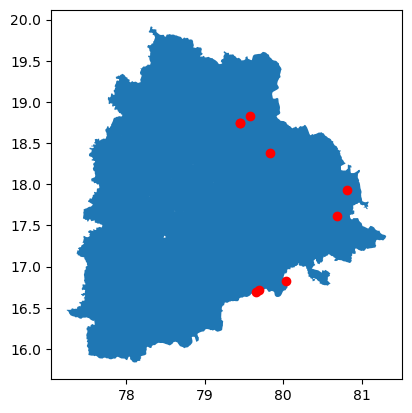

In [163]:
shape_telangana.plot()
plt.scatter(gdp_power_plants_tel.Longitude, gdp_power_plants_tel.Latitude, c='red')
plt.show()

In [164]:
df = pd.merge(df, power_plant_scores[['index', 'Year', 'PowP_score']], how='left', on=['index', 'Year'])

In [165]:
df.columns

Index(['index', 'Mandal_Nam', 'Dist_Name', 'geometry', 'ModifiedDateTime',
       'NO2', 'PM2.5', 'BA_mean', 'BA_median', 'BA_sum', 'SSM_mean',
       'SSM_median', 'SSM_max', 'SSM_min', 'SSM_percentile_90', 'ST_mean',
       'ST_median', 'ST_max', 'ST_min', 'ST_percentile_90', 'PRE_mean',
       'PRE_median', 'PRE_max', 'PRE_min', 'PRE_percentile_90', 'PRE_sum',
       'POP_mean', 'POP_median', 'Year', 'Month', 'Crops', 'Crops_Prop',
       'Trees', 'Trees_Prop', 'Built Area', 'Built_Area_Prop', 'RWI_mean',
       'RWI_max', 'RWI_min', 'RWI_percentile_90', 'RWI_median', 'Soil Type',
       'time_to_rur_median', 'Season', 'PowP_score'],
      dtype='object')

In [171]:
df_selected = df[['index', 'Mandal_Nam', 'Dist_Name', 'geometry', 'ModifiedDateTime', 'Year', 'Month', 'Season', 'NO2', 'PM2.5', 'SSM_mean', 'SSM_median', 'SSM_min', 'SSM_max', 'SSM_percentile_90', 'PRE_mean', 'PRE_median', 'PRE_min', 'PRE_max', 'PRE_percentile_90', 'PRE_sum', 
    'POP_mean', 'POP_median', 'ST_mean', 'ST_median', 'ST_min', 'ST_max', 'ST_percentile_90', 'RWI_mean', 'RWI_median', 'RWI_min', 'RWI_max', 'RWI_percentile_90',
    'BA_mean', 'BA_median', 'BA_sum', 'Crops', 'Crops_Prop', 'Trees', 'Trees_Prop', 'Built Area', 'Built_Area_Prop', 'time_to_rur_median', 'PowP_score', 'Soil Type']]

In [172]:
df_selected = pd.merge(df_selected, mandal_boundaries[['index', 'Area']], on=['index'], how = 'left')

In [173]:
df_selected.columns

Index(['index', 'Mandal_Nam', 'Dist_Name', 'geometry', 'ModifiedDateTime',
       'Year', 'Month', 'Season', 'NO2', 'PM2.5', 'SSM_mean', 'SSM_median',
       'SSM_min', 'SSM_max', 'SSM_percentile_90', 'PRE_mean', 'PRE_median',
       'PRE_min', 'PRE_max', 'PRE_percentile_90', 'PRE_sum', 'POP_mean',
       'POP_median', 'ST_mean', 'ST_median', 'ST_min', 'ST_max',
       'ST_percentile_90', 'RWI_mean', 'RWI_median', 'RWI_min', 'RWI_max',
       'RWI_percentile_90', 'BA_mean', 'BA_median', 'BA_sum', 'Crops',
       'Crops_Prop', 'Trees', 'Trees_Prop', 'Built Area', 'Built_Area_Prop',
       'time_to_rur_median', 'PowP_score', 'Soil Type', 'Area'],
      dtype='object')

In [183]:
del df_selected['POP_mean']
del df_selected['POP_median']

In [188]:
stat_df_POP_mean['Year'] = stat_df_POP_mean['ModifiedDateTime'].dt.year
stat_df_POP_median['Year'] = stat_df_POP_median['ModifiedDateTime'].dt.year

In [204]:
df_selected = pd.merge(df_selected, dataframes[-2][['index', 'Year', 'POP_mean']], on =['index', 'Year'], how='left')
df_selected = pd.merge(df_selected, dataframes[-1][['index', 'Year', 'POP_median']], on =['index', 'Year'], how='left')

In [206]:
os.chdir('c:\\Users\\Jesse\\OneDrive\\Documenten\\Master BAOR\\Thesis\\GitHub\\dicra\\analytics\\sandbox\\notebooks\\crop_fires\\Data_csv\\results_csv')
df_selected.to_csv('data_tiffs.csv')

In [5]:
os.chdir('c:\\Users\\Jesse\\OneDrive\\Documenten\\Master BAOR\\Thesis\\GitHub\\dicra\\analytics\\sandbox\\notebooks\\crop_fires\\Data_csv\\results_csv')

df = pd.read_csv('data_tiffs.csv', index_col = 0)

In [6]:
df

,index,Mandal_Nam,Dist_Name,geometry,ModifiedDateTime,Year,Month,Season,NO2,PM2.5,...,Trees,Trees_Prop,Built Area,Built_Area_Prop,time_to_rur_median,PowP_score,Soil Type,Area,POP_mean,POP_median
0,0,Abdullapurmet,Rangareddy,"POLYGON ((78.59020512800009 17.34506113200013,...",2016-01-01,2016,1,None,238.435040,47.675000,...,5.2694,0.0,45.7679,0.2,8.0,11.022133,Chromic Luvisols,255.0,708.346051,600.070068
1,1,Achampet,Nagarkurnool,"POLYGON ((78.91204436700008 16.54875844100007,...",2016-01-01,2016,1,None,143.419573,32.478572,...,23.0433,0.0,10.2378,0.0,13.0,9.724638,Lithosols,502.0,137.321354,97.347229
2,2,Adavidevulapally,Nalgonda,"POLYGON ((79.52429751700004 16.72522135500003,...",2016-01-01,2016,1,None,289.370079,46.425000,...,0.2498,0.0,1.9839,0.0,12.0,20.370017,Pellic Luvisols,126.0,82.025389,64.107906
3,3,Addagudur,Yadadri Bhuvanagiri,"POLYGON ((79.36516547400004 17.48429223000005,...",2016-01-01,2016,1,None,157.972443,42.300000,...,0.2634,0.0,4.3925,0.0,12.0,15.860505,Chromic Luvisols,142.0,157.084636,143.738419
4,4,Addakal,Mahabubnagar,"POLYGON ((77.92377499000008 16.58074325200005,...",2016-01-01,2016,1,None,166.535431,40.179999,...,1.2012,0.0,5.0373,0.0,12.0,6.998230,Pellic Luvisols,134.0,238.653614,185.930542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34923,587,Mosra,Nizamabad,"POLYGON ((78.03813400200016 18.52915054300013,...",2019-12-01,2019,12,None,210.629918,62.633331,...,5.9346,0.0,1.5342,0.0,11.0,9.926591,Chromic Luvisols,244.0,232.026257,174.902817
34924,588,Chandur,Nizamabad,"POLYGON ((78.04060240200022 18.4965250740002, ...",2019-12-01,2019,12,None,200.787399,60.099998,...,4.5895,0.0,1.3385,0.0,11.0,9.875827,Chromic Luvisols,244.0,209.223037,170.120781
34925,589,Chowtakur,Sangareddy,"POLYGON ((78.06919574500017 17.67324188400011,...",2019-12-01,2019,12,None,187.500000,56.275001,...,0.0013,0.0,3.9377,0.0,8.0,10.046265,Chromic Luvisols,249.0,221.828521,196.083588
34926,590,Masaipet,Medak,"POLYGON ((78.44551160999998 17.94706595500003,...",2019-12-01,2019,12,None,170.078741,54.900001,...,0.0131,0.0,3.1912,0.0,8.0,12.317036,Chromic Luvisols,212.0,283.615465,220.201614


In [8]:
df['Season'] = 0

for i in range(0, len(df)):
    if (df['Month'].iloc[i] == 3) | (df['Month'].iloc[i] == 4) | (df['Month'].iloc[i] == 5):
        df['Season'].iloc[i] = 'Rabi'
    elif (df['Month'].iloc[i] == 9) | (df['Month'].iloc[i] == 10):
        df['Season'].iloc[i] = 'Kharif' 
    else:
        df['Season'].iloc[i] = 'None'


In [10]:
os.chdir('c:\\Users\\Jesse\\OneDrive\\Documenten\\Master BAOR\\Thesis\\GitHub\\dicra\\analytics\\sandbox\\notebooks\\crop_fires\\Data_csv\\results_csv')
df.to_csv('data_tiffs.csv')